In [1]:
# This file uses a polarization measure develop in PROMUEVA, to install
# this package use: pip install git+https://github.com/Ulvenforst/pol_measures.git
# For more information visit the documentation: https://github.com/ulvenforst/pol_measures

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from measures.metrics import MECNormalized

# Plot Distribution

Load csv

In [2]:
# To measure polarization on a particular dataset, change the path to the csv file
df = pd.read_csv('./csv/PensionReform.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9997 non-null   int64  
 1   created_at           9997 non-null   object 
 2   author_id            9997 non-null   int64  
 3   in_reply_to_user_id  5831 non-null   float64
 4   likert_scale_Q1      9997 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 390.6+ KB


Get distribution

In [ ]:
# Many datasets have multiple classification tags regarding a different subject
# To check classification results, change the column name (likert_scale_QX) to the desired one 
# For more details for classification subjects check description file in csv folder

values = df['likert_scale_Q1'].value_counts().to_dict()
values = dict(sorted(values.items()))
values = list(values.values())
values

[3742, 389, 1448, 549, 3869]

Plot distribution

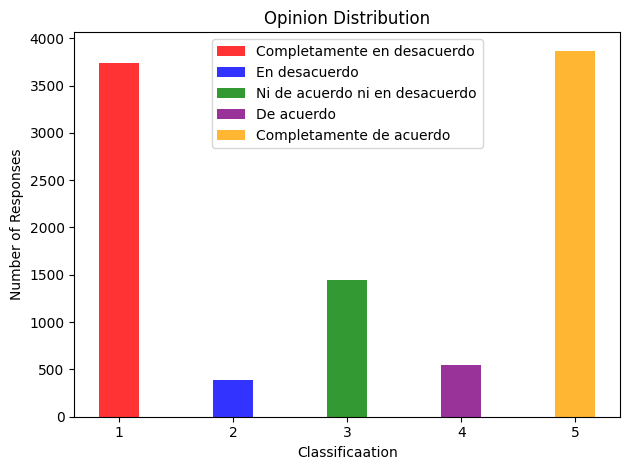

In [4]:
fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35
opacity = 0.8

colors = ['red', 'blue', 'green', 'purple', 'orange']
label = ['Completamente en desacuerdo', 'En desacuerdo', 'Ni de acuerdo ni en desacuerdo', 'De acuerdo', 'Completamente de acuerdo']
rects1 = plt.bar(index + bar_width, values, bar_width, alpha=opacity, label=label, color=colors)

plt.xlabel('Classificaation')
plt.ylabel('Number of Responses')
plt.title('Opinion Distribution')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()


# Polarization Measure

In [5]:
x = np.array([0.0,0.25,0.5,0.75,1.0])
w = np.array(values)

x, w

(array([0.  , 0.25, 0.5 , 0.75, 1.  ]), array([3742,  389, 1448,  549, 3869]))

In [6]:
a = 2
b = 1.15
mec = MECNormalized(alpha=a, beta=b)
val = mec(x,w, labels='all')


print(f"MEC({a}, {b}) value: {val['value']:.6f}")
print(f"Polarization level (5 tags): {val['classifications']['percentile'][5]}")

MEC(2, 1.15) value: 0.626280
Polarization level (5 tags): very_high
